# Imports

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt

# Image Augmentation

## Common image augmentation methods

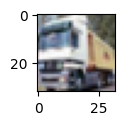

In [3]:
plt.figure(figsize=(1, 2))
dataset = torchvision.datasets.CIFAR10(root="data", download=True)
#print one image from the dataset
image, label = dataset[1]
plt.imshow(image)

In [10]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    fig = plt.figure(figsize=(num_cols * scale, num_rows * scale))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(Y[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### Flipping and cropping

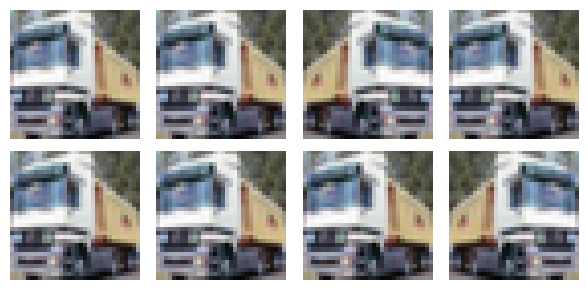

In [11]:
apply(image, torchvision.transforms.RandomHorizontalFlip())

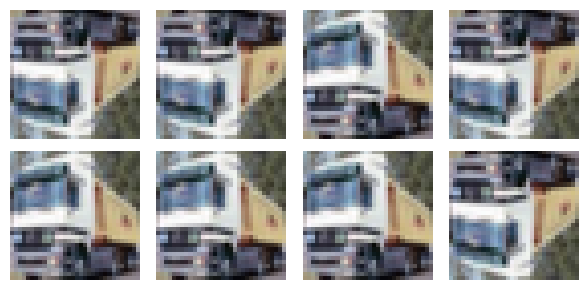

In [12]:
apply(image, torchvision.transforms.RandomVerticalFlip())

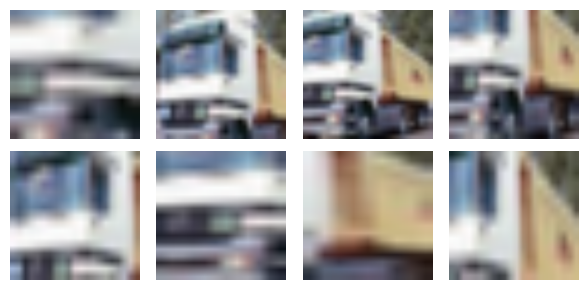

In [13]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(image, shape_aug)

### Changing colors

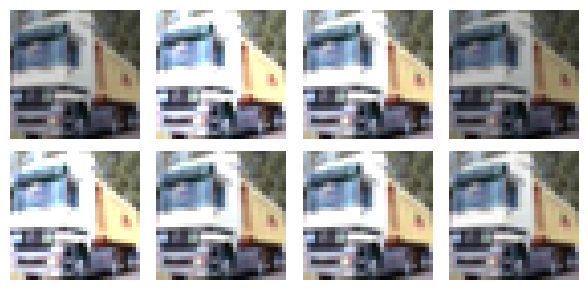

In [14]:
apply(image, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

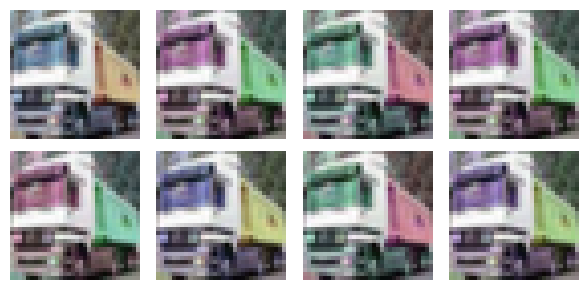

In [15]:
apply(image, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

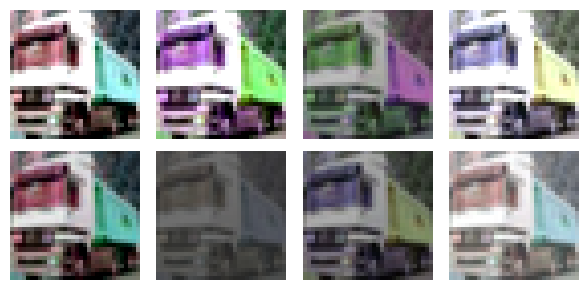

In [16]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(image, color_aug)

### Combining augmentation methods

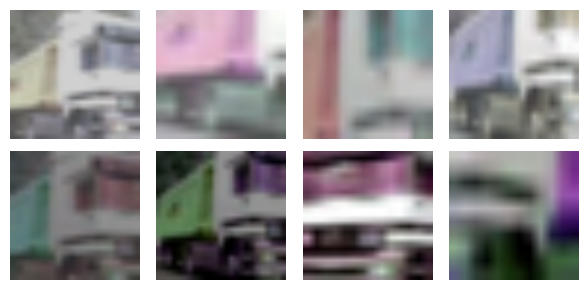

In [18]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(image, augs)

## Training with image augmentation

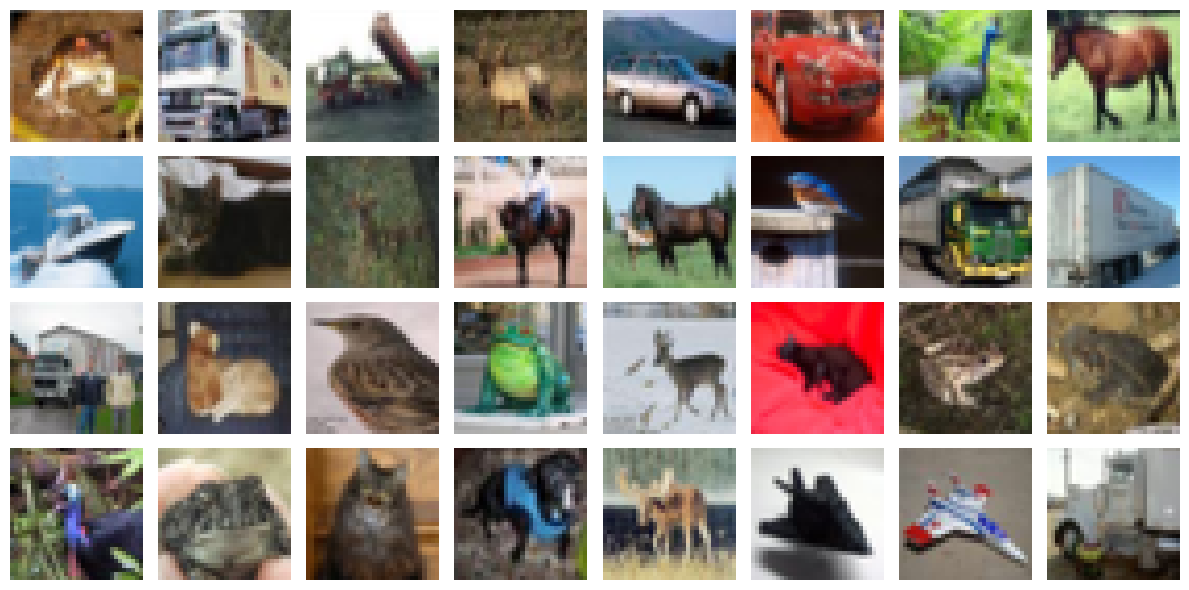

In [20]:
all_images = torchvision.datasets.CIFAR10(train=True, root="data",
                                          download=True)
# Create a figure with the specified size
plt.figure(figsize=(12, 6))
# Display 32 images in a 4x8 grid
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(all_images[i][0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])